In [1]:
import torch
from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler
import matplotlib.pyplot as plt
import os

In [2]:
def generate_image(
    prompt,
    num_inference_steps=50,
    guidance_scale=7.5,
    width=512,
    height=512,
    seed=42,
    model_id="CompVis/stable-diffusion-v1-4",
    scheduler_type="LMS",
    device="cuda",
    save_image=False,
    output_path="generated_image.png"
):
    generator = torch.manual_seed(seed)

    if scheduler_type == "LMS":
        scheduler = LMSDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    else:
        raise ValueError(f"Unsupported scheduler type: {scheduler_type}")

    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        scheduler=scheduler,
        torch_dtype=torch.float16 if device == "cuda" else torch.float32
    ).to(device)

    with torch.autocast("cuda") if device == "cuda" else torch.no_grad():
        result = pipe(
            prompt=prompt,
            height=height,
            width=width,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator
        )

    image = result.images[0]

    # Tampilkan gambar
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Generated Image")
    plt.show()

    # Simpan jika diminta
    if save_image:
        image.save(output_path)
        print(f"Gambar disimpan ke: {output_path}")

    return image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

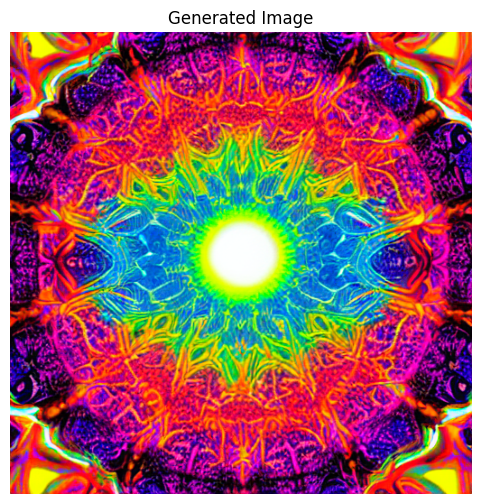

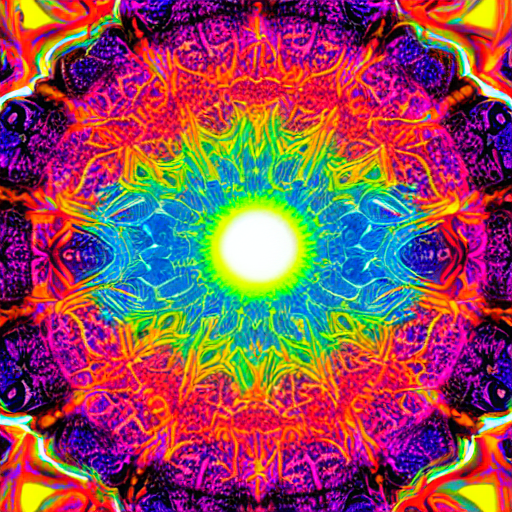

In [13]:
prompt = "psychedelic Dreams"
generate_image(
    prompt=prompt,
    seed=42,
    save_image=False,  # Set to True if you want to save the image
    device="cuda"
)